## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

## Считываем файл и смотрим общую информацию

In [2]:
data = pd.read_csv('/Users/tim/Desktop/netology/python/итог/HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Базовые статистики

In [6]:
#напечатаем базовые статистики по числовым значениям датафрейма с помощью цикла

for i in list(data.columns):
    if i == 'department' or i == 'salary':
        continue
    else:
        median_ = data[i].median()
        mode_ = data[i].mode()[0]
        var_ = data[i].var()
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr) 
        upper_bound = q3 + (1.5 * iqr)
        outliers = [x for x in data[i] if x < lower_bound or x > upper_bound] #выбросы
        print(f'Показатель - {i},',
              f'Медиана - {median_},',
              f'Мода - {mode_},',
              f'Дисперсия - {var_},',
              f'Интерквартильный размах - {iqr},',
              f'25-й процентиль - {lower_bound},',
              f'75-й процентиль - {upper_bound},',
              f'Выбросы - {set(outliers)},',
              sep = '\n')
        print()

Показатель - satisfaction_level,
Медиана - 0.64,
Мода - 0.1,
Дисперсия - 0.061817200647087255,
Интерквартильный размах - 0.37999999999999995,
25-й процентиль - -0.12999999999999995,
75-й процентиль - 1.39,
Выбросы - set(),

Показатель - last_evaluation,
Медиана - 0.72,
Мода - 0.55,
Дисперсия - 0.02929886443156327,
Интерквартильный размах - 0.30999999999999994,
25-й процентиль - 0.09500000000000014,
75-й процентиль - 1.335,
Выбросы - set(),

Показатель - number_project,
Медиана - 4.0,
Мода - 4,
Дисперсия - 1.5192839143893255,
Интерквартильный размах - 2.0,
25-й процентиль - 0.0,
75-й процентиль - 8.0,
Выбросы - set(),

Показатель - average_montly_hours,
Медиана - 200.0,
Мода - 135,
Дисперсия - 2494.313174809979,
Интерквартильный размах - 89.0,
25-й процентиль - 22.5,
75-й процентиль - 378.5,
Выбросы - set(),

Показатель - time_spend_company,
Медиана - 3.0,
Мода - 3,
Дисперсия - 2.1319978117222864,
Интерквартильный размах - 1.0,
25-й процентиль - 1.5,
75-й процентиль - 5.5,
Выбросы - {8,

## Корреляционная матрица

In [7]:
#собираем только количественные данные

data_corr = data[['satisfaction_level','last_evaluation',
    'number_project', 'average_montly_hours',
    'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [8]:
data_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

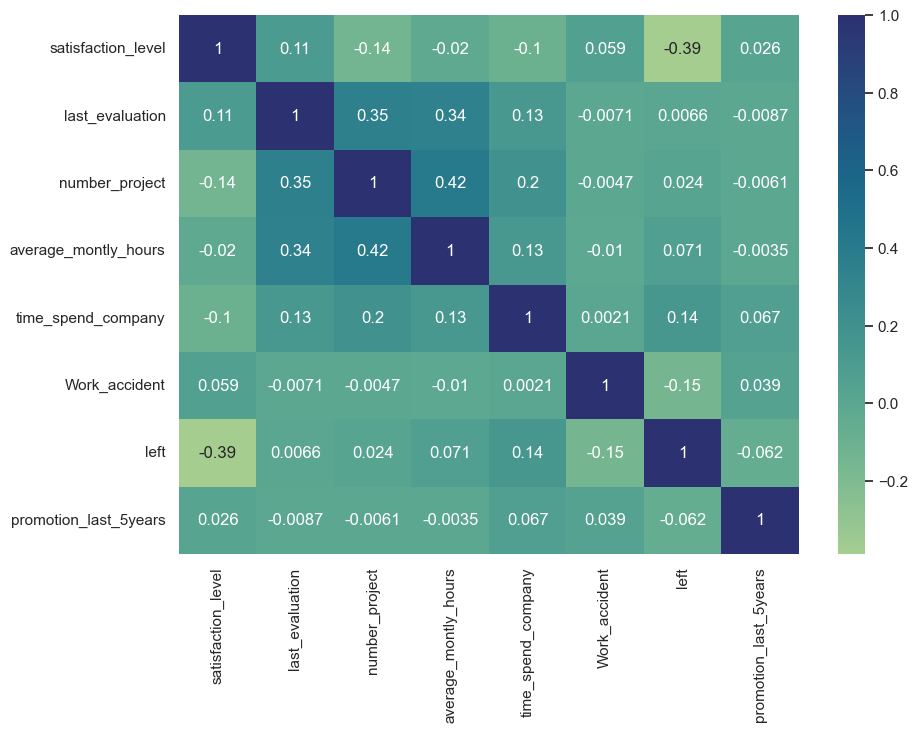

In [9]:
#визуализация с помощью тепловой карты

sns.set(rc = {'figure.figsize':(10, 7)})
sns.heatmap(data_corr.corr(), annot = True, cmap = 'crest')

 Самые коррелирующие показатели - Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы,
 а наименее коррелирующие - Происходили ли несчастные случаи на рабочем месте с сотрудником и Стаж работы в компании в годах.

## Рассчитайте сколько сотрудников работает в каждом департаменте

In [10]:
#распределение по департаментам


data_ = data['department'].value_counts().to_frame()
data_

,department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


## Показать распределение сотрудников по зарплатам 

In [11]:
data_sal = data['salary'].value_counts().to_frame()
data_sal

,salary
low,7316
medium,6446
high,1237


## Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
#распределение по зарплатам внутри департаментов

data.groupby(['department','salary']).count()['left'].to_frame()

left
department  salary      
IT          high      83
            low      609
            medium   535
RandD       high      51
            low      364
            medium   372
accounting  high      74
            low      358
            medium   335
hr          high      45
            low      335
            medium   359
management  high     225
            low      180
            medium   225
marketing   high      80
            low      402
            medium   376
product_mng high      68
            low      451
            medium   383
sales       high     269
            low     2099
            medium  1772
support     high     141
            low     1146
            medium   942
technical   high     201
            low     1372
            medium  1147

## Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [17]:
#цель

data_class = data_corr['left']

In [18]:
#разбиваем датасет на тестовую и учебную выборки

X_train, X_test, y_train, y_test = train_test_split(data_corr,
                                                    data_class,
                                                    random_state=42)

In [19]:
lda = LinearDiscriminantAnalysis()

In [20]:
#обучаем модель

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [21]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [22]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


In [23]:
#метрика качества модели - точность

accuracy_score(y_test, lda.predict(X_test))

0.7536